In [680]:
index_col = np.array(CBE_geneCounts['ensembl_id'])

array(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419', ...,
       'ENSG00000280452', 'ENSG00000280453', 'ENSG00000280454'],
      dtype=object)

In [677]:
index_geneC = np.array(list(CBE_geneCounts)[1:])
index_covarC = np.array(CBE_covariates['ID'])
index_geneT = np.array(list(TCX_geneCounts)[1:])
index_covarT = np.array(TCX_covariates['ID'])

In [190]:
lis = list(df)

lis_new = []
for i in np.arange(len(lis)):
    t = lis[i][-11:]
    lis_new.append(t)
newlis = np.array(lis_new)
finlis = pd.DataFrame(newlis)[0]

df_n = CBE_geneCounts_T.rename(columns = finlis)

In [196]:
df_n.head()

,00000000003,00000000005,00000000419,00000000457,00000000460,00000000938,00000000971,00000001036,00000001084,00000001167,...,00000280445,00000280446,00000280447,00000280448,00000280449,00000280450,00000280451,00000280452,00000280453,00000280454
1000_CER,11.1996,0,14.8207,8.6075,12.09,6.1341,20.005,10.1509,31.4816,31.1056,...,0,0,0.0198,5.1051,0,0,0,0,0,0
1010_CER,6.6007,0,23.9052,17.4651,15.6276,3.1576,8.1884,10.0973,31.6655,41.406,...,0,0,0,3.9604,0,0,0,0,0,0
1015_CER,12.7405,0,22.4332,9.473,21.8017,2.1417,14.6351,15.9531,40.5555,33.9656,...,0,0,0,4.5031,0,0,0,0,0,0
1019_CER,11.4382,0,18.4772,10.2737,22.3072,7.66,18.5289,11.4382,33.9524,36.6955,...,0,0,0.0518,3.7524,0,0,0,0,0,0
1027_CER,10.3473,0.0261,21.7398,10.6347,16.1481,3.8149,12.1764,14.711,35.3534,38.3583,...,0,0,0.0261,3.9978,0,0,0,0,0,0


In [70]:
rdfn = df_n.reset_index()

rdfn = rdfn.fillna(0)

rdfn.drop('index',axis=1,inplace=True)

In [71]:
rdfn.head()

,00000000003,00000000005,00000000419,00000000457,00000000460,00000000938,00000000971,00000001036,00000001084,00000001167,...,00000280445,00000280446,00000280447,00000280448,00000280449,00000280450,00000280451,00000280452,00000280453,00000280454
0,11.1996,0.0000,14.8207,8.6075,12.0900,6.1341,20.0050,10.1509,31.4816,31.1056,...,0.0,0.0,0.0198,5.1051,0.0,0.0,0.0,0.0,0.0,0.0
1,6.6007,0.0000,23.9052,17.4651,15.6276,3.1576,8.1884,10.0973,31.6655,41.4060,...,0.0,0.0,0.0000,3.9604,0.0,0.0,0.0,0.0,0.0,0.0
2,12.7405,0.0000,22.4332,9.4730,21.8017,2.1417,14.6351,15.9531,40.5555,33.9656,...,0.0,0.0,0.0000,4.5031,0.0,0.0,0.0,0.0,0.0,0.0
3,11.4382,0.0000,18.4772,10.2737,22.3072,7.6600,18.5289,11.4382,33.9524,36.6955,...,0.0,0.0,0.0518,3.7524,0.0,0.0,0.0,0.0,0.0,0.0
4,10.3473,0.0261,21.7398,10.6347,16.1481,3.8149,12.1764,14.7110,35.3534,38.3583,...,0.0,0.0,0.0261,3.9978,0.0,0.0,0.0,0.0,0.0,0.0


In [1071]:
K = 10
kf = KFold(n_splits=K)
cv_accacc = np.zeros(num_costs)

finC_rfe_xb = finC_rfe_cpd.values
finT_rfe_xb = finT_rfe_tpd.values
finC_rfe_yb = np.ravel(o)
finT_rfe_yb = np.ravel(p)

for i in range(num_costs):
    accur_total = 0
    for train_index, test_index in kf.split(finC_rfe_xb):
        finacc_x_train, finacc_x_test = finC_rfe_xb[train_index], finT_rfe_xb[test_index]
        finacc_y_train, finacc_y_test = finC_rfe_yb[train_index], finT_rfe_yb[test_index]
        svm = LinearSVC(C = cost_range[i])
        svm.fit(finacc_x_train, finacc_y_train)
        pred = svm.predict(finacc_x_test)
        accur = accuracy_score(finacc_y_test, pred)
        accur_total += accur
    cv_accacc[i]  =accur_total/10
    print('i = ', i)

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19


In [1072]:
i = np.where(cv_accacc == np.max(cv_accacc))
cost = cost_range[i[0]]
print('C_best = ', cost, 'highest accuracy = ', cv_accacc[i[0]])

C_best =  [  1.           1.27427499   1.62377674   2.06913808   2.6366509
   3.35981829   4.2813324    5.45559478   6.95192796   8.8586679
  11.28837892  14.38449888  18.32980711  23.35721469  29.76351442
  37.92690191  48.32930239  61.58482111  78.47599704 100.        ] highest accuracy =  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]


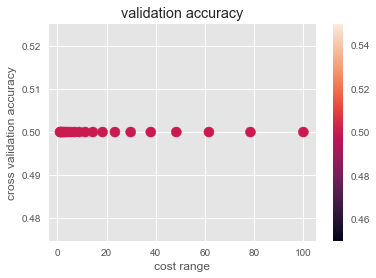

In [1073]:
colors = cv_accacc
plt.scatter(cost_range, cv_accacc, 100, c=colors)
plt.colorbar()
plt.xlabel('cost range')
plt.ylabel('cross validation accuracy')
plt.title('validation accuracy')
plt.show()

In [953]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

In [1017]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(XX, scaler=None):
    if not scaler:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaler.fit(XX)
    XX = scaler.transform(XX)
    return XX, scaler

n_train = int(0.8 * CBE_x.shape[0])
train_test = pd.concat((CBE_x, CBE_y), axis = 1).reset_index(drop=True)
col_to_drop = CBE_x.columns[CBE_x.columns.str.endswith('_cat')]
col_to_dummify = CBE_x.columns[CBE_x.columns.str.endswith('_cat')].astype(str).tolist()

for col in col_to_dummify:
    dummy = pd.get_dummies(train_test[col].astype('category'))
    columns = dummy.columns.astype(str).tolist()
    columns = [col + '_' + w for w in columns]
    dummy.columns = columns
    train_test = pd.concat((train_test, dummy), axis=1)

train_test.drop(col_to_dummify, axis=1, inplace=True)
train_test_scaled, scaler = scale_data(train_test)
train = np.array(train_test_scaled[:n_train, :])
test = np.array(train_test_scaled[n_train:, :])
print('\n Shape of processed train data:', train.shape)
print(' Shape of processed test data:', test.shape)


 Shape of processed train data: (127, 64254)
 Shape of processed test data: (32, 64254)



Running PCA again ...
Explained variance: 0.5466
Individual variance contributions:
0.1301255622333099
0.08313198587671304
0.058042371690904364
0.054549090299481635
0.0247961508676174
0.02219242969239311
0.01996927282002959
0.019613407997707798
0.018497640784176945
0.015511336126199985
0.013598283743522684
0.01262178576971117
0.011703379285729745
0.010777474571974687
0.009860458720085985
0.009174854442789895
0.008771148528625412
0.008197474337429138
0.007815755533929039
0.007602842648552725


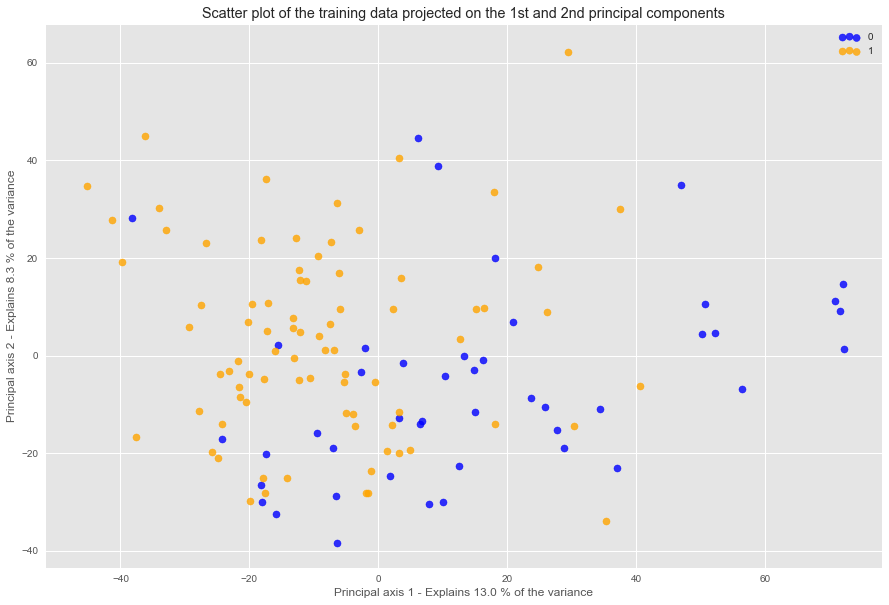

In [1020]:
print('\nRunning PCA again ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(train)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

plt.figure(1, figsize=(15, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[yy[:n_train] == i, 0], X_pca[yy[:n_train] == i, 1], color=color, s=200,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-02.png', dpi=150)
plt.show()